In [1]:
#Project_1 Team 3

#Step 1: Import necessary components.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Step 2: Importing the data. 
data_file = pd.read_csv('../Resources/NFWBS_PUF_2016_data.csv')
data_file.head()


,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
0,10350,2,3,5,5,6,55,3,3,3,...,1,4,8,0,0,0,0,1,0,0.367292
1,7740,1,3,6,6,6,51,2,2,3,...,1,2,3,0,0,0,0,2,0,1.327561
2,13699,1,3,4,3,4,49,3,3,3,...,1,4,9,0,0,0,1,2,1,0.835156
3,7267,1,3,6,6,6,49,3,3,3,...,1,3,7,0,0,0,0,1,0,1.410871
4,7375,1,3,4,4,4,49,3,3,3,...,1,2,4,0,0,1,0,4,1,4.260668


In [2]:
#Step 3: Use the shape function to see how many columns and rows there are.
data_file.shape

(6394, 217)

In [3]:
#Step 4: Find the column names.
data_file.columns


#Findings: there are way too many columns for it to display all of the column names.

Index(['PUF_ID', 'sample', 'fpl', 'SWB_1', 'SWB_2', 'SWB_3', 'FWBscore',
       'FWB1_1', 'FWB1_2', 'FWB1_3',
       ...
       'PPMSACAT', 'PPREG4', 'PPREG9', 'PPT01', 'PPT25', 'PPT612', 'PPT1317',
       'PPT18OV', 'PCTLT200FPL', 'finalwt'],
      dtype='object', length=217)

In [4]:
#Step 5: See how many data points are in each column. 
data_file.count()


PUF_ID         6394
sample         6394
fpl            6394
SWB_1          6394
SWB_2          6394
               ... 
PPT612         6394
PPT1317        6394
PPT18OV        6394
PCTLT200FPL    6394
finalwt        6394
Length: 217, dtype: int64

In [5]:
#Step 6: See how many null answers are in each column.
data_file.isnull().sum()

PUF_ID         0
sample         0
fpl            0
SWB_1          0
SWB_2          0
              ..
PPT612         0
PPT1317        0
PPT18OV        0
PCTLT200FPL    0
finalwt        0
Length: 217, dtype: int64

In [6]:
#Step 7: Drop all null values in the dataset.
data_file.dropna

#Findings: There were no null values in the dataset. The reason why this is the case is because whenever
#the participant in the survey didn't respond to a question, -4 was entered into that space. 

<bound method DataFrame.dropna of       PUF_ID  sample  fpl  SWB_1  SWB_2  SWB_3  FWBscore  FWB1_1  FWB1_2  \
0      10350       2    3      5      5      6        55       3       3   
1       7740       1    3      6      6      6        51       2       2   
2      13699       1    3      4      3      4        49       3       3   
3       7267       1    3      6      6      6        49       3       3   
4       7375       1    3      4      4      4        49       3       3   
...      ...     ...  ...    ...    ...    ...       ...     ...     ...   
6389   11220       3    3      6      7      7        61       3       3   
6390   13118       3    2      7      7      7        59       3       4   
6391    8709       1    3      5      6      6        59       3       4   
6392    8515       1    3      5      5      5        46       2       2   
6393    8516       3    2      4      6      4        49       3       3   

      FWB1_3  ...  PPMSACAT  PPREG4  PPREG9  PPT01  P

In [7]:
#Step 8: Complete a count to see if any rows were dropped. 
data_file.count()

#Findings: No rows were dropped. 

PUF_ID         6394
sample         6394
fpl            6394
SWB_1          6394
SWB_2          6394
               ... 
PPT612         6394
PPT1317        6394
PPT18OV        6394
PCTLT200FPL    6394
finalwt        6394
Length: 217, dtype: int64

In [8]:
#Step 9: Drop all values that are equal to -4.
data_after_drop_df = data_file[data_file != -4].dropna()

#Do another count to see how many "null" answers were in the dataset.
data_after_drop_df.count()

#Findings: There was only one row that had any responses that were -4. Our team looked into
#this further and there was only one person who did not answer all of the survey questions.

PUF_ID         6393
sample         6393
fpl            6393
SWB_1          6393
SWB_2          6393
               ... 
PPT612         6393
PPT1317        6393
PPT18OV        6393
PCTLT200FPL    6393
finalwt        6393
Length: 217, dtype: int64

In [9]:
#Step 10: check for duplicates.
duplicated_rows = data_after_drop_df.duplicated()
data_after_drop_df.loc[data_after_drop_df.duplicated()]

data_after_duplicates_df = data_after_drop_df.drop_duplicates()

data_after_duplicates_df.count()

cleaned_data = data_after_duplicates_df
cleaned_data.head()


,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
0,10350,2,3,5.0,5.0,6.0,55.0,3.0,3.0,3.0,...,1,4,8,0,0,0,0,1,0,0.367292
1,7740,1,3,6.0,6.0,6.0,51.0,2.0,2.0,3.0,...,1,2,3,0,0,0,0,2,0,1.327561
2,13699,1,3,4.0,3.0,4.0,49.0,3.0,3.0,3.0,...,1,4,9,0,0,0,1,2,1,0.835156
3,7267,1,3,6.0,6.0,6.0,49.0,3.0,3.0,3.0,...,1,3,7,0,0,0,0,1,0,1.410871
4,7375,1,3,4.0,4.0,4.0,49.0,3.0,3.0,3.0,...,1,2,4,0,0,1,0,4,1,4.260668


In [10]:
#Step 11: Check for outliers. This will be completed on a per question basis. 

In [11]:
"""Reminder our overarching question: How do these specific financial factors effect 
the people's financial well-being?"""

"Reminder our overarching question: How do these specific financial factors effect \nthe people's financial well-being?"

In [12]:
#Step 12: Question 1 Work:Group


1
-1
5
-1
95.0
-1.0
Repayment of Student Debt            6347
Ability to Pay Your Bills on Time    6347
Financial Well-Being Score           6347
dtype: int64


(array([  12.,    0.,    0.,  137.,    0.,  148.,  491.,    0.,  940.,
        4665.]),
 array([-1. , -0.4,  0.2,  0.8,  1.4,  2. ,  2.6,  3.2,  3.8,  4.4,  5. ]),
 <BarContainer object of 10 artists>)

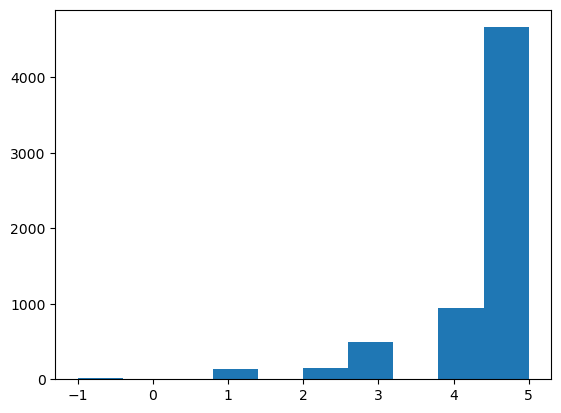

In [27]:
#Step 13: Question 2 Work: Kerek
#Question: Do students with high debt have trouble paying bills on time? 

#Look at BENEFITS_4 Tuition Reimbursement and/or Student Debt Repayment 
#Look at MANAGE1_1 Paid all your bills on time Survey item (modified) 

#Create a new dataframe with only those variables as columns.
student_data = cleaned_data[['BENEFITS_4','MANAGE1_1', 'FWBscore']]

student_df = pd.DataFrame(student_data)

#Rename the columns.
renamed_data = student_df.rename(columns={"BENEFITS_4" : "Repayment of Student Debt", "MANAGE1_1" : "Ability to Pay Your Bills on Time", "FWBscore" : "Financial Well-Being Score"})
renamed_data.head()

#Find the max answer for Repayment of Student Debt
max_debt_repayment = renamed_data['Repayment of Student Debt'].max()
print(max_debt_repayment)

#Find the min answer for Repayment of Student Debt
min_debt_repayment = renamed_data['Repayment of Student Debt'].min()
print(min_debt_repayment)

#Repayment of Student Debt meaning: -1: refused, 0: No, 1: Yes

#Find the max answer for Ability to Pay Your Bills on Time
max_ability_to_pay = renamed_data['Ability to Pay Your Bills on Time'].max()
print(max_ability_to_pay)

#Find the min answer for Ability to Pay Your Bills on Time
min_ability_to_pay = renamed_data['Ability to Pay Your Bills on Time'].min()
print(min_ability_to_pay)

#Ability to pay meaning: -1: refused, 1: Never, 
#2 : Seldom, 3: Sometimes, 4: Often, 5: Always.

#Financial Well-Being Score: the lower the number the worse the financial well-being is. 
#Find the max answer for Ability to Pay Your Bills on Time
max_FWBscore = renamed_data['Financial Well-Being Score'].max()
print(max_FWBscore)

#Find the min answer for Ability to Pay Your Bills on Time
min_FWBscore = renamed_data['Financial Well-Being Score'].min()
print(min_FWBscore)


"""Now that I know what the data means, I am going to take out the -1 values for each of the columns since that value is associated
with refusing to answer the question. 
"""

drop_minus_one = renamed_data[renamed_data != -1].dropna()
print(drop_minus_one.count())

"""Put the data in a histogram of the ability to pay bills column."""

#Create the histogram.
plt.hist(renamed_data['Ability to Pay Your Bills on Time'])

#Findings: The vast majority of people can pay their bills. 

(array([  43.,    0.,    0.,    0.,    0., 5315.,    0.,    0.,    0.,
        1035.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

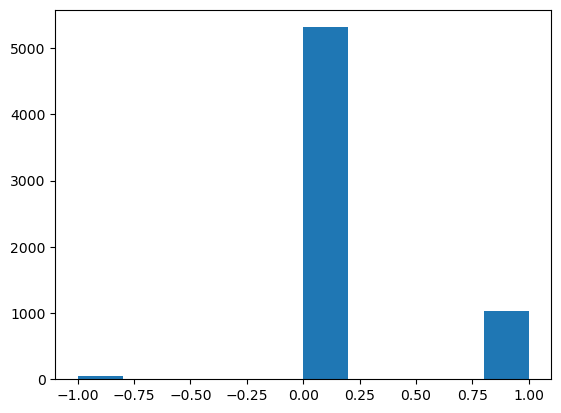

In [25]:
#Create the histogram.
plt.hist(renamed_data['Repayment of Student Debt'])

#The vast majority of people aren't paying their student debt off. This likely is because the people who took the survey
#don't have student debt. 

(array([   4.,   37.,  136.,  420.,  811., 1866., 1758.,  830.,  366.,
         165.]),
 array([-1. ,  8.6, 18.2, 27.8, 37.4, 47. , 56.6, 66.2, 75.8, 85.4, 95. ]),
 <BarContainer object of 10 artists>)

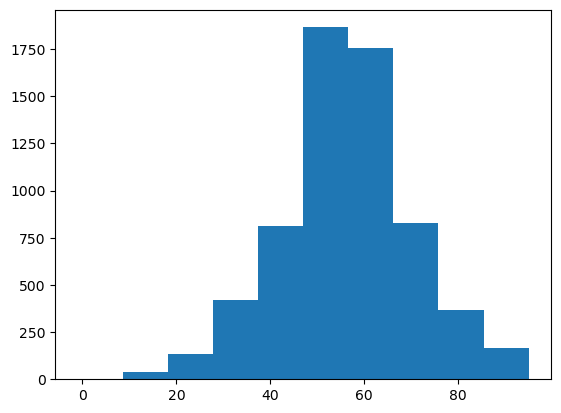

In [28]:
#Create a histogram for the Financial Well-Being Score
plt.hist(renamed_data['Financial Well-Being Score'])

#Findings: The financial well-being score has a curve that is slightly skewed to the right. This means that on average people 
#have a higher financial well-being score.

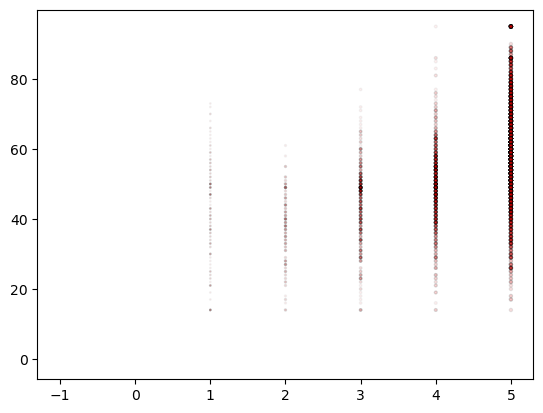

In [38]:
#Create a scatter plot comparing the financial well-being score and the ability to pay bills on time variable.
plt.scatter(renamed_data['Ability to Pay Your Bills on Time'], renamed_data['Financial Well-Being Score'], marker="o", facecolors="red", edgecolors="black",
            s=renamed_data['Ability to Pay Your Bills on Time'], alpha=0.05)

(array([  50.,    0.,    0.,    0.,  173.,    0., 1388.,    0., 3737.,
        1045.]),
 array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ]),
 <BarContainer object of 10 artists>)

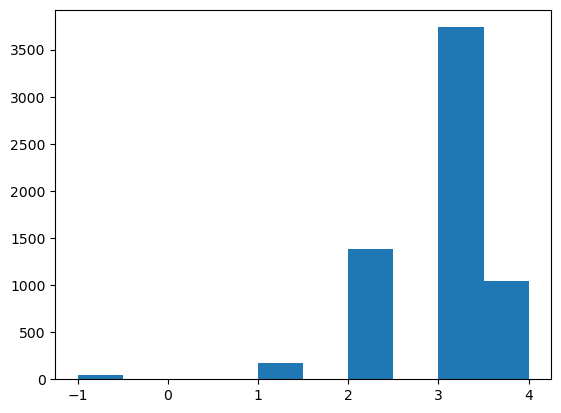

In [44]:
#Step 14: Question 3 Work: Kerek 
self_control_df = cleaned_data[['FWBscore', 'SELFCONTROL_2', 'FRUGALITY']]


#Rename columns
Q3_renamed_df = self_control_df.rename(columns={'SELFCONTROL_2' : 'Self Control', 'FRUGALITY': 'Frugality' })

#Create a histogram of the Self Control and Frugality columns. 
#This variable is from 1 through 4. The question is "I am good at resisting temptation. 
#Here is what they mean: 1 = Not at all, 2 = Not very well, 3 = Very well,4 = Completely well

plt.hist(Q3_renamed_df['Self Control'])

#Findings: There is a right skew to the histogram. This means that most people say they resist temptation
#very well and completely. 

(array([  15.,    0.,   22.,    0.,   50.,  195.,    0.,  805., 2460.,
        2846.]),
 array([-1. , -0.3,  0.4,  1.1,  1.8,  2.5,  3.2,  3.9,  4.6,  5.3,  6. ]),
 <BarContainer object of 10 artists>)

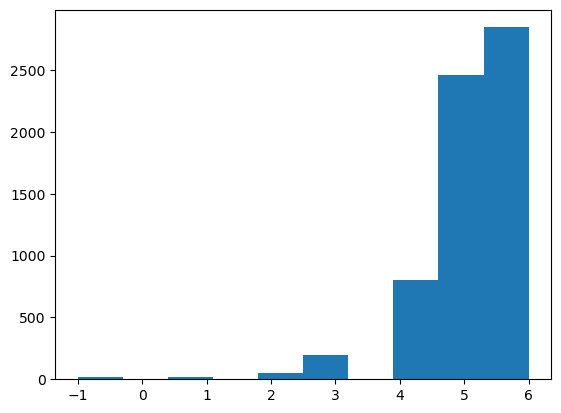

In [45]:
#Create a histogram for the Frugality variable. 
#The Frugality question is I can reuse an item I already have, there is no sense in buying somehting new. 
#The variable range is 1 through 6: 1 = Strongly Disagree, 2 = Disagree, 3 = Disagree slightly, 4 = Agree slightly
# 5 = Agree, 6 = Strongly Agree.

plt.hist(Q3_renamed_df['Frugality'])

#Findings: Large right skew meaning that most people slightly agree to strongly agree and item 
#can be used more than once


In [ ]:
#Step 15: Question 4 Work: Raisha

In [ ]:
#Step 16: Question 5 Work: Raisha

In [ ]:
#Step 17: Question 6 Work: Elia

In [ ]:
#Step 18: Question 7 Work: Elia

In [ ]:
#Step 19: Question 8 Work: To be Determined.